In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('prosperLoanData.csv',index_col=1)

## Understanding the Dataset

In [22]:
data.shape

(113937, 80)

In [23]:
data.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,,,,,,,,,,,,,,,,,,,,,
193129,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1209647,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
81716,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
658116,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
909464,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 193129 to 1140093
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingCreationDate                  113937 non-null  object 
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  Estimat

In [25]:
data.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Correlation Matrix

In [4]:
# #Some values are not in the matrix becouse they aren't encoded yet
# plt.figure(figsize=(18,15))
# sns.heatmap(data.corr(),cmap='viridis',annot=False)

### Checking for duplicated rows

In [26]:
data.duplicated().sum()

0

### Getting Missing Values
getting the columns with null values and filling it

In [27]:
##list of a columns with have null values
null = []
for col in data.columns :
    if (data[col].isnull().sum() > 0) :
        null.append(col)

In [28]:
for i in null :
    sum_null = data[i].isnull().sum()
    percent_null = (sum_null/113937) * 100
    print(i)
    if percent_null <= 70 :
        # print(i)
        print('Remain')
        print(percent_null)
    else :
        print('Discard')
    #     # high_range_nulls.append(i)

CreditGrade
Discard
ClosedDate
Remain
51.64959582927408
BorrowerAPR
Remain
0.02194195037608503
EstimatedEffectiveYield
Remain
25.52638738952228
EstimatedLoss
Remain
25.52638738952228
EstimatedReturn
Remain
25.52638738952228
ProsperRating (numeric)
Remain
25.52638738952228
ProsperRating (Alpha)
Remain
25.52638738952228
ProsperScore
Remain
25.52638738952228
BorrowerState
Remain
4.840394252964358
Occupation
Remain
3.149108717975723
EmploymentStatus
Remain
1.9791639239228696
EmploymentStatusDuration
Remain
6.692294864705935
GroupKey
Discard
CreditScoreRangeLower
Remain
0.5187077068906502
CreditScoreRangeUpper
Remain
0.5187077068906502
FirstRecordedCreditLine
Remain
0.6117415764852506
CurrentCreditLines
Remain
6.673863626390022
OpenCreditLines
Remain
6.673863626390022
TotalCreditLinespast7years
Remain
0.6117415764852506
InquiriesLast6Months
Remain
0.6117415764852506
TotalInquiries
Remain
1.0172288194353019
CurrentDelinquencies
Remain
0.6117415764852506
AmountDelinquent
Remain
6.689661830660

In [29]:
# a list of all the columns with null values and object type
null_obj = ['CreditGrade','BorrowerState','Occupation','EmploymentStatus','GroupKey']
# a list of all the Datetime Columns
date = ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']

## Filling Missing Values

#### Replacing with customized value
the 'f' value indicates null

In [30]:
data['ProsperRating (Alpha)'].fillna('f',inplace= True)

'Other' value is indicative and frequent in both columns

In [31]:
## filling with other value since it already exists
data['Occupation'].fillna('Other',inplace=True)
data['EmploymentStatus'].fillna('Other',inplace=True)

#### filling with 'Mode' 

we fill with mode since every column has a less than 5% missing values

In [32]:
data['TotalCreditLinespast7years'].value_counts()
data['TotalCreditLinespast7years'].fillna(data['TotalCreditLinespast7years'].mode(),inplace=True)

In [33]:
# data['CreditScoreRangeLower'].value_counts()
# data['CreditScoreRangeUpper'].value_counts()
data['CreditScoreRangeLower'].fillna(data['CreditScoreRangeLower'].mode(),inplace=True)
data['CreditScoreRangeUpper'].fillna(data['CreditScoreRangeUpper'].mode(),inplace=True)

In [34]:
data['BorrowerState'].value_counts()
## the most frequent value is CA 14717
data['BorrowerState'].fillna(data['BorrowerState'].mode(),inplace=True)

#### filling with mean

In [35]:
data['RevolvingCreditBalance'].fillna(data['RevolvingCreditBalance'].mean().astype(int),inplace=True)
data['BankcardUtilization'].fillna(data['BankcardUtilization'].mean().astype(int),inplace=True)
data['AvailableBankcardCredit'].fillna(data['AvailableBankcardCredit'].mean().astype(int),inplace=True)

#### Replacing the Rest of Columns with 0s 

In [36]:
for col in null:
    # if(data[col].dtype == 'float64') :
    data[col] = data[col].fillna(0)
for col in date :
    data[col] = data[col].fillna(0)    

## Converting data types

In [ ]:
data[date] = data[date].astype('datetime64[ns]')

## Discarding Some columns 

high_range_nulls list has many over 70% null values, we will discard them

"ListingKey" since its indicator of the user like Id

"LoanNumber","LoanKey" both of them is unique indicator of Loan so we can discard one or both of them

In [38]:
## we can drop loankey since there is a LoanNumber 
high_range_nulls =['CreditGrade','GroupKey']

data.drop(high_range_nulls,axis =1,inplace=True)
data.drop('ListingKey',axis=1,inplace=True)
data.drop('LoanNumber',axis=1,inplace=True)

# Data Visualization 

### Is there Outliers?  

Using boxplot and Distplot on some random columns it seems that the dataset has many outliers or skewed 

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vert

<AxesSubplot:xlabel='EmploymentStatusDuration'>

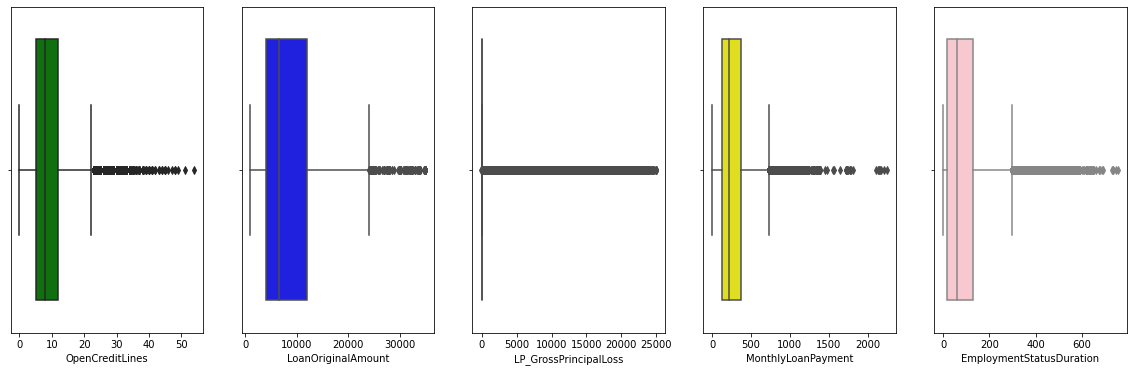

In [174]:
f, axes = plt.subplots(1, 5,figsize=(20,6))
# col = data.columns.values[:7]
sns.boxplot(x='OpenCreditLines',data=data,color='green',orient='v',ax=axes[0])
sns.boxplot(x= data['LoanOriginalAmount'],color='blue',orient='v',ax=axes[1])
sns.boxplot(x= data['LP_GrossPrincipalLoss'],color='red',orient='v',ax=axes[2])
sns.boxplot(x= data['MonthlyLoanPayment'],color='yellow',orient='v',ax=axes[3])
sns.boxplot(x= data['EmploymentStatusDuration'],color='pink',orient='v',ax=axes[4])

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:ylabel='Density'>

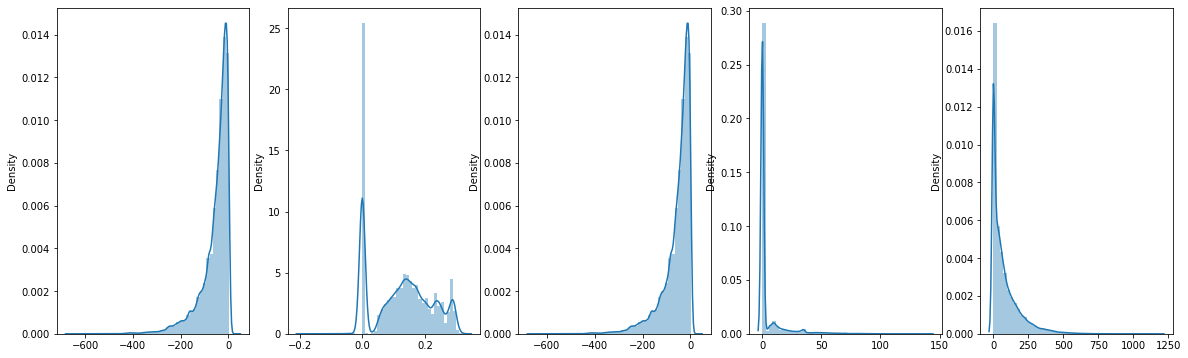

In [180]:
# sns.distplot(data['Investors'])
f, axes = plt.subplots(1, 5,figsize=(20,6))
# col = data.columns.values[:7]
sns.distplot(x=data['LP_ServiceFees'],ax=axes[0])
sns.distplot(x= data['EstimatedEffectiveYield'],ax=axes[1])
sns.distplot(x= data['LP_ServiceFees'],ax=axes[2])
sns.distplot(x= data['OnTimeProsperPayments'],ax=axes[3])
sns.distplot(x= data['Investors'],ax=axes[4])

### Q1: what is the most frequent value for 'CreditGrade' Column ?



<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

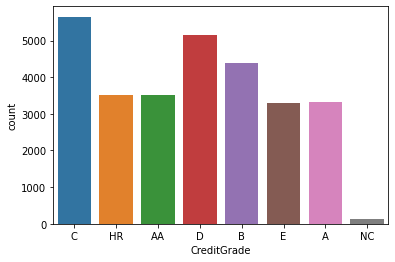

In [7]:
#data['CreditGrade'].value_counts()
sns.countplot(x='CreditGrade',data= data)

### Q2:Does the CreditGrade with alot missing values affect the AmountDelinquent ?

some values get high amout of delinquents such as HR

<AxesSubplot:xlabel='CreditGrade', ylabel='AmountDelinquent'>

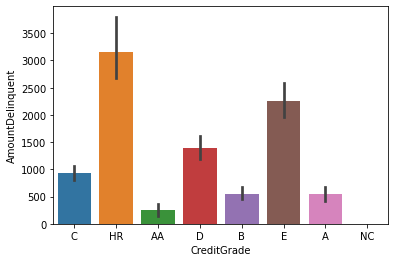

In [30]:
data[['CreditGrade','AmountDelinquent']]
sns.barplot(y='AmountDelinquent',x='CreditGrade',data=data)


### How many Loans are still in Processing and how many are Completed ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

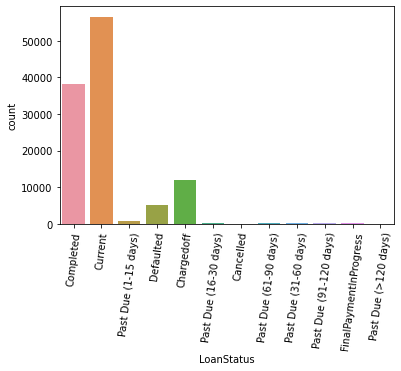

In [30]:
sns.countplot(x=data['LoanStatus'])
plt.xticks(rotation=83)

### Q3: What is the highest BorrowerRate ?

the distribution is between .1 to .2

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BorrowerRate', ylabel='Density'>

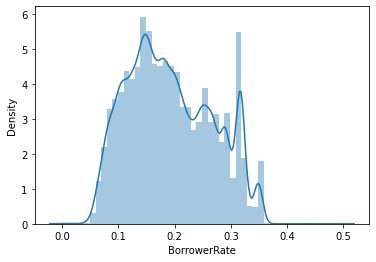

In [38]:
sns.distplot(data['BorrowerRate'])

### Q4: Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

yes,according to the distribution below

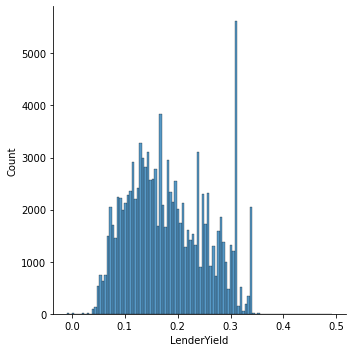

In [43]:
sns.displot(data['LenderYield'])

### Q5: Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

yes, higher CreditGrade gives higher Monthly payments

<AxesSubplot:xlabel='CreditGrade', ylabel='LenderYield'>

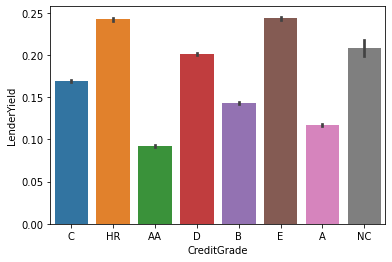

In [15]:
# data[(data['CreditGrade']=='AA')]['MonthlyLoanPayment']
sns.barplot(y='LenderYield',x='CreditGrade',data = data)

### Q6: Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

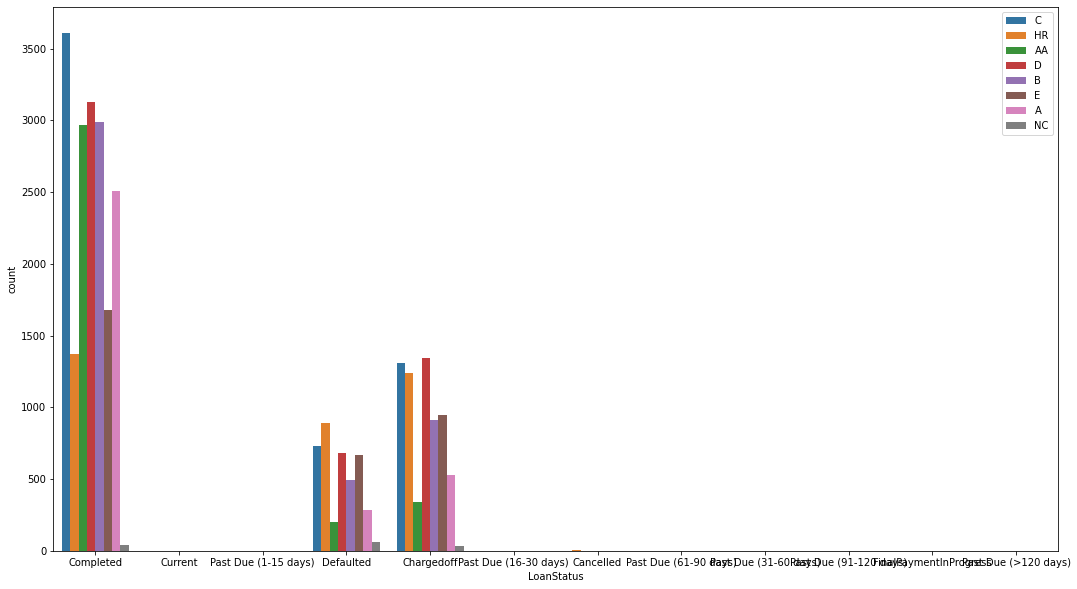

In [56]:
plt.figure(figsize=(18,10))
sns.countplot(x='LoanStatus',hue='CreditGrade',data = data)
plt.legend(loc='upper right')

### Q5: Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.

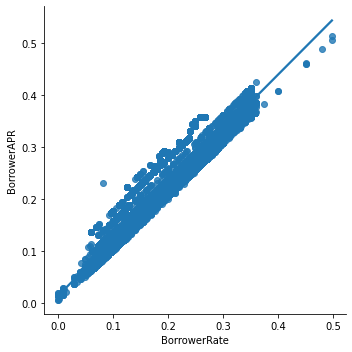

In [60]:
# data[['BorrowerRate','BorrowerAPR']]
sns.lmplot(x='BorrowerRate',y='BorrowerAPR',data=data)

### Visualiztion of the ProsperRating 

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

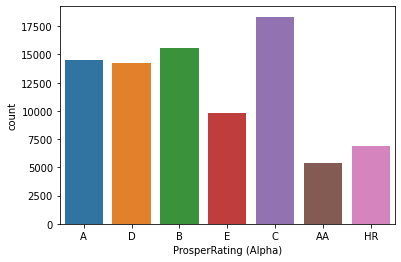

In [20]:
sns.countplot(data['ProsperRating (Alpha)'])

In [45]:
# # revolving is the credit balance when opened the pulled 
# plt.figure(figsize=(20,10))
# plt.scatter(x='RevolvingCreditBalance',y='Investors',data=data)
# plt.xscale('log')


### How much does every user have in banalnce ?

it seems like most of the users of the website are between 0 to 120000 dollars balance

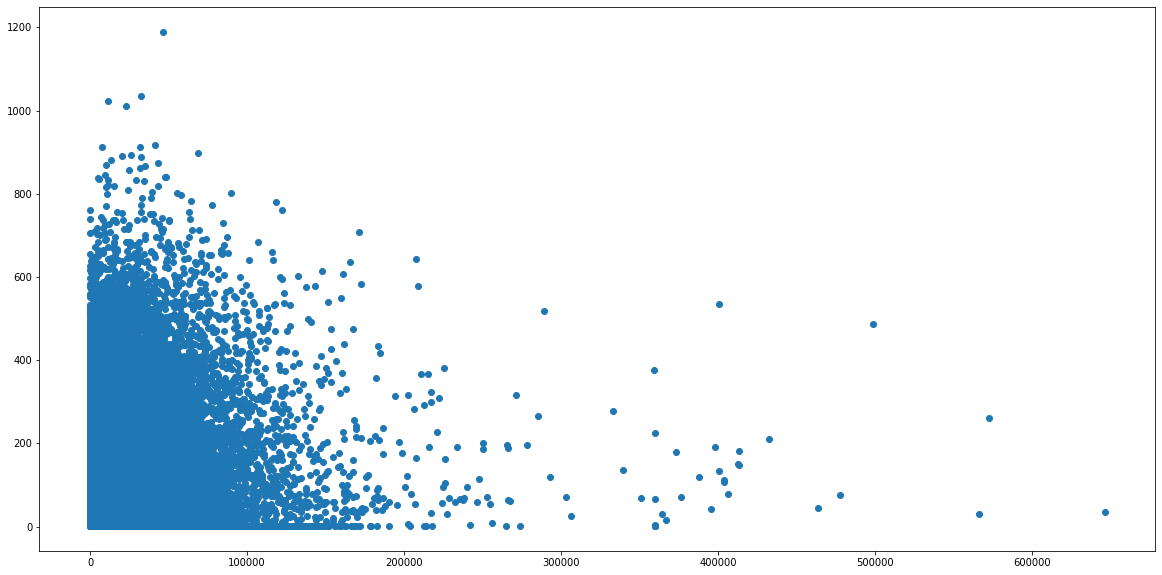

In [84]:
plt.figure(figsize=(20,10))
plt.scatter(x='AvailableBankcardCredit',y='Investors',data=data)

### Distribution of Tradeline

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalTrades', ylabel='Density'>

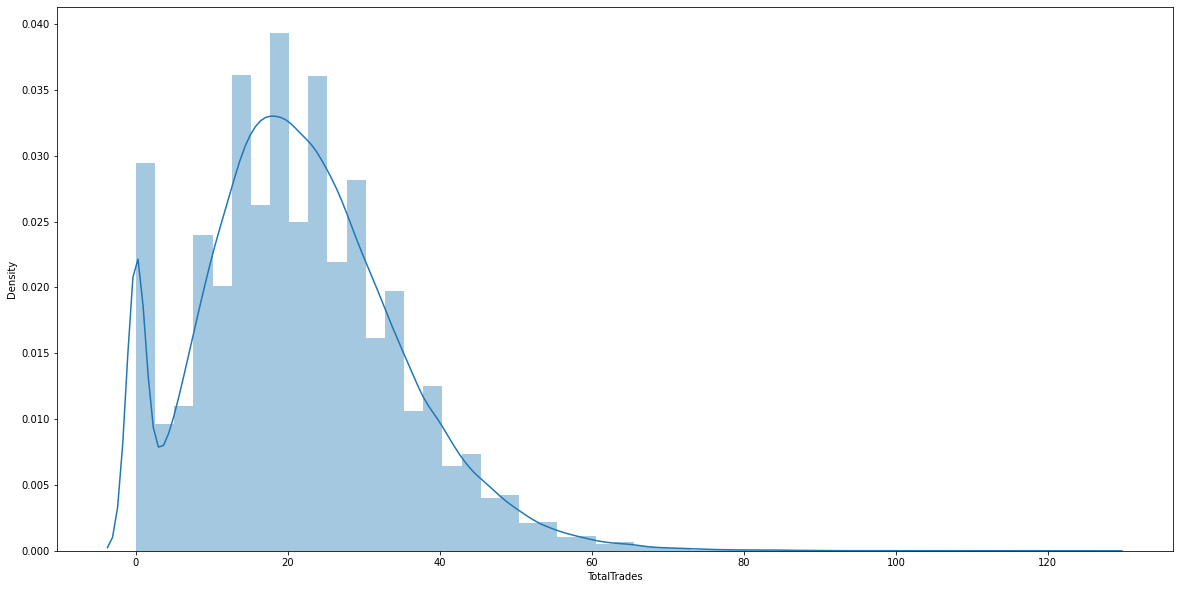

In [23]:
plt.figure(figsize=(20,10))
# plt.hist(y='AvailableBankcardCredit',x='TotalTrades',data=data)
sns.distplot(data['TotalTrades'])

### What is the IncomeRange of the users and if there Documents to prove it ?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '$25,000-49,999'),
  Text(1, 0, '$50,000-74,999'),
  Text(2, 0, 'Not displayed'),
  Text(3, 0, '$100,000+'),
  Text(4, 0, '$75,000-99,999'),
  Text(5, 0, '$1-24,999'),
  Text(6, 0, 'Not employed'),
  Text(7, 0, '$0')])

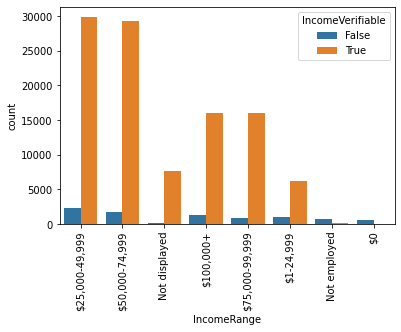

In [24]:
sns.countplot(x=data['IncomeRange'],hue=data['IncomeVerifiable'])
plt.xticks(rotation=90)

### how many users have taken a loan before ?


it turns out that more than 80% of the users had no loans before

<AxesSubplot:xlabel='TotalProsperLoans', ylabel='count'>

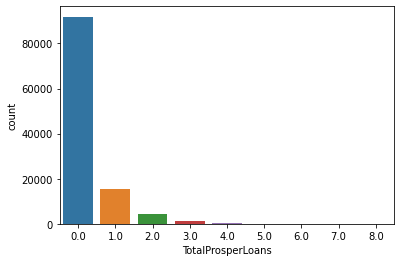

In [25]:
sns.countplot(x=data['TotalProsperLoans'])

### how long is the period of a loan and the most frequent value ?

it seems that there are some loans reached the 90 months , many loans are at the first few months

<AxesSubplot:xlabel='LoanMonthsSinceOrigination', ylabel='count'>

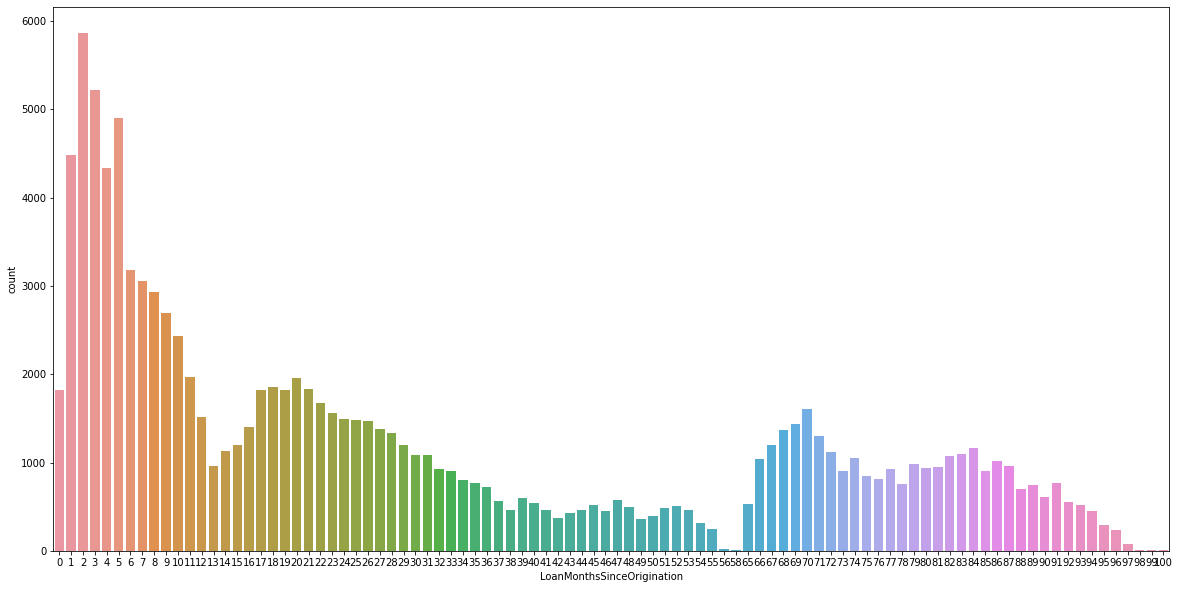

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['LoanMonthsSinceOrigination'])

### What are the loan amounts ?

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

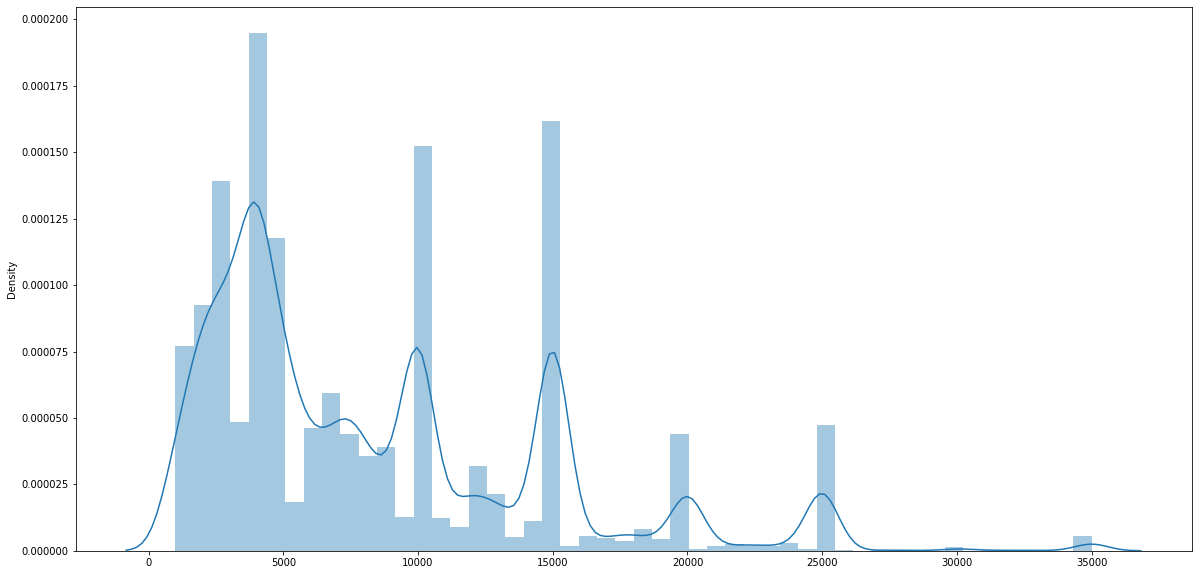

In [27]:
# it seems like the loan amouts distributes from 1000 up to 35000 USD and the most frequent loan value is 3000 USD 
plt.figure(figsize=(20,10))
sns.distplot(x=data['LoanOriginalAmount'])

### what is top 10 Groups in the Dataset ?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '783C3371218786870A73D20'),
  Text(1, 0, '3D4D3366260257624AB272D'),
  Text(2, 0, '6A3B336601725506917317E'),
  Text(3, 0, 'FEF83377364176536637E50'),
  Text(4, 0, 'C9643379247860156A00EC0'),
  Text(5, 0, '9BBE337094173775621CD34'),
  Text(6, 0, 'CD0E3364909037313F32874'),
  Text(7, 0, 'CC8D33653247904019A9059'),
  Text(8, 0, 'FE113364863511529673D04'),
  Text(9, 0, 'B0473364376920128370B13')])

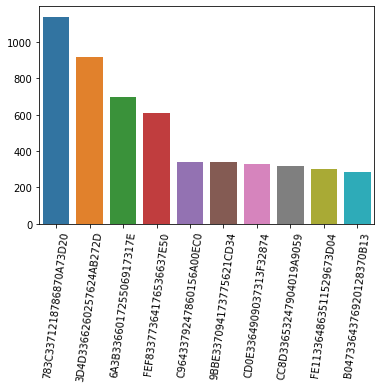

In [29]:
grp_key_index = data['GroupKey'].value_counts().iloc[1:11].index
grp_key = data['GroupKey'].value_counts().iloc[1:11].values
sns.barplot(x=grp_key_index,y=grp_key,data = data)
plt.xticks(rotation=83)

### How many Loans are still in Processing and how many are Completed ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Completed'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Past Due (1-15 days)'),
  Text(3, 0, 'Defaulted'),
  Text(4, 0, 'Chargedoff'),
  Text(5, 0, 'Past Due (16-30 days)'),
  Text(6, 0, 'Cancelled'),
  Text(7, 0, 'Past Due (61-90 days)'),
  Text(8, 0, 'Past Due (31-60 days)'),
  Text(9, 0, 'Past Due (91-120 days)'),
  Text(10, 0, 'FinalPaymentInProgress'),
  Text(11, 0, 'Past Due (>120 days)')])

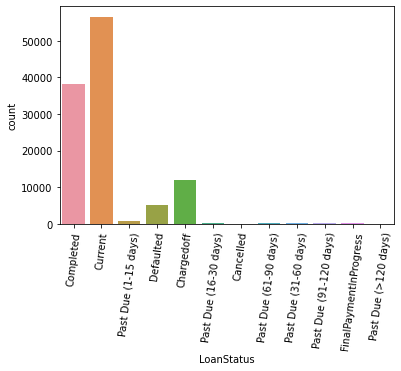

In [30]:
sns.countplot(x=data['LoanStatus'])
plt.xticks(rotation=83)

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOriginationDate', ylabel='Density'>

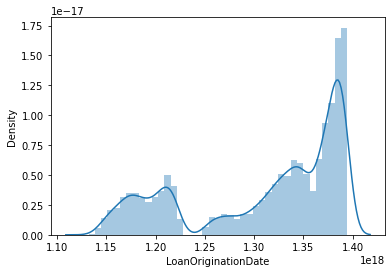

In [38]:
sns.distplot(data['LoanOriginationDate'])
# plt.xticks(yearx)

### What is most frequent Occupation (job) ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, 'Professional'),
  Text(1, 0, 'Skilled Labor'),
  Text(2, 0, 'Executive'),
  Text(3, 0, 'Sales - Retail'),
  Text(4, 0, 'Laborer'),
  Text(5, 0, 'Food Service'),
  Text(6, 0, 'Fireman'),
  Text(7, 0, 'Waiter/Waitress'),
  Text(8, 0, 'Construction'),
  Text(9, 0, 'Computer Programmer'),
  Text(10, 0, 'Sales - Commission'),
  Text(11, 0, 'Retail Management'),
  Text(12, 0, 'Engineer - Mechanical'),
  Text(13, 0, 'Military Enlisted'),
  Text(14, 0, 'Clerical'),
  Text(15, 0, 'Teacher'),
  Text(16, 0, 'Clergy'),
  Text(17, 0, 'Accountant/CPA'),
  Text(18, 0, 'Attorney'),
  Text(19, 0, 'Nurse (RN)'),
  Text(20, 0, 'Analyst'),
  Text(21, 0, "Nurse's Aide"),
  Text(22, 0, 'Investor'),
  

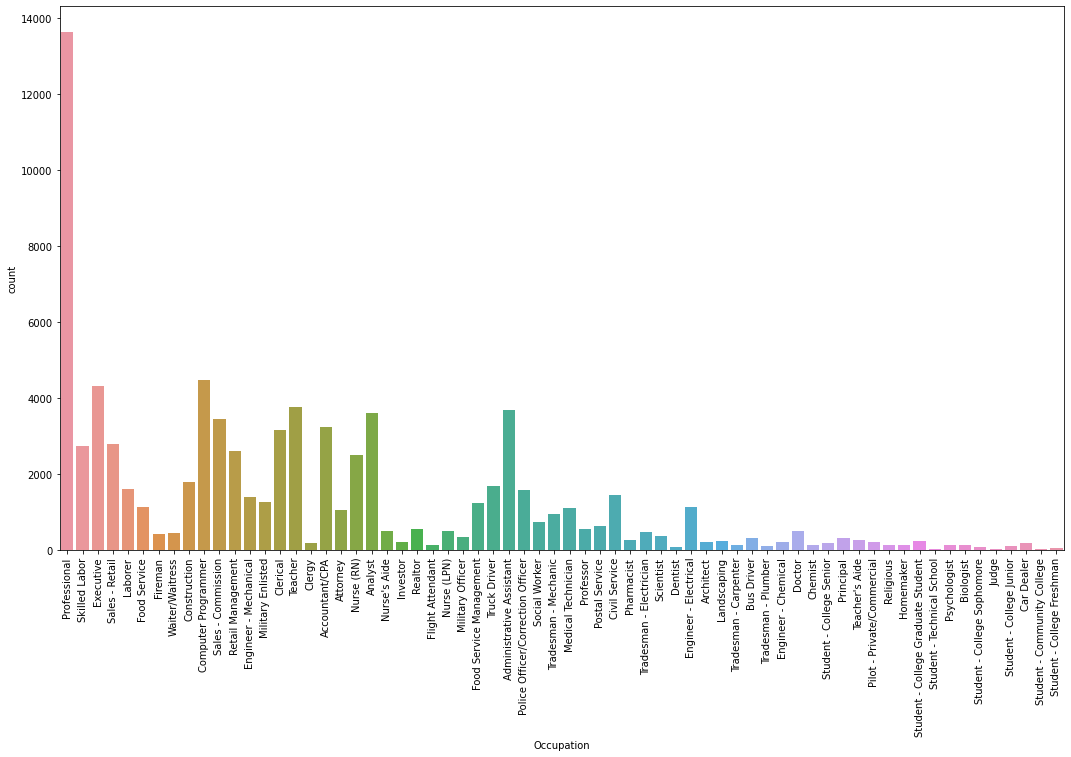

In [73]:
plt.figure(figsize=(18,10))
# sns.countplot(data.iloc[occ.index])
sns.countplot(x="Occupation", data=data[-(data['Occupation'] == 'Other')])
plt.xticks(rotation =90)  

### what is the purpous of the loan ?

Seems reansonalbe that about half of the users take loans to pay a debt 

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x16b0800c970>,
 [Text(0, 0, 'Not Available'),
  Text(1, 0, 'Debt'),
  Text(2, 0, 'Home improvment'),
  Text(3, 0, 'Business'),
  Text(4, 0, 'Personal loan'),
  Text(5, 0, 'Student case'),
  Text(6, 0, 'Auto'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Baby'),
  Text(9, 0, 'Boat'),
  Text(10, 0, 'Cosmetic'),
  Text(11, 0, 'Engagement'),
  Text(12, 0, 'Green loan'),
  Text(13, 0, 'Household Expenses'),
  Text(14, 0, 'Large Purchases'),
  Text(15, 0, 'Medical'),
  Text(16, 0, 'Motorcycle'),
  Text(17, 0, 'RV'),
  Text(18, 0, 'Taxes'),
  Text(19, 0, 'Vacation'),
  Text(20, 0, 'Wedding')])

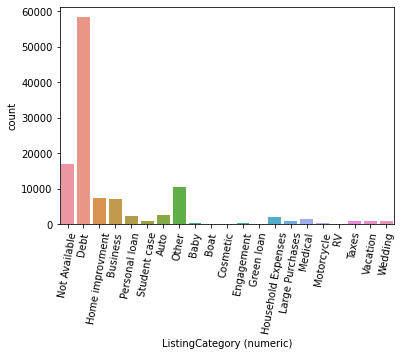

In [191]:
nums = range(0,21)
label = ['Not Available','Debt','Home improvment','Business','Personal loan','Student case'
         ,'Auto','Other','Baby','Boat','Cosmetic','Engagement','Green loan','Household Expenses'
         ,'Large Purchases','Medical','Motorcycle','RV','Taxes','Vacation','Wedding']
sns.countplot(data['ListingCategory (numeric)'])
plt.xticks(nums,label,rotation=80)

### what is the relation between the incomerange and the monthlypayment ?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '$25,000-49,999'),
  Text(1, 0, '$50,000-74,999'),
  Text(2, 0, 'Not displayed'),
  Text(3, 0, '$100,000+'),
  Text(4, 0, '$75,000-99,999'),
  Text(5, 0, '$1-24,999'),
  Text(6, 0, 'Not employed'),
  Text(7, 0, '$0')])

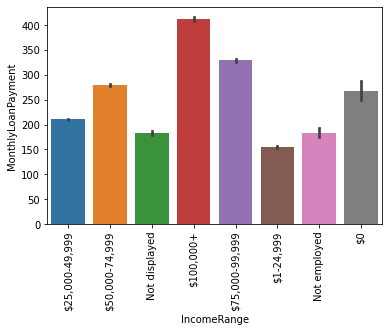

In [71]:
sns.barplot(x='IncomeRange',y='MonthlyLoanPayment',data=data)
plt.xticks(rotation=90)

### What is the relation between LoanAmout and Number of Investors ?

expected a linear correlation between them but i doesn't seem so

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Investors'>

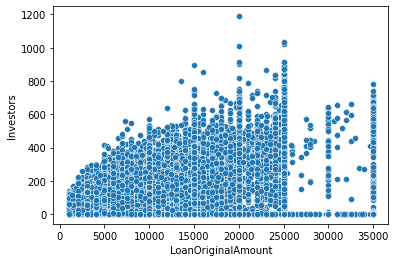

In [95]:
sns.scatterplot(x='LoanOriginalAmount',y='Investors',data= data)

### Is there a relation between Occupation and BorrowerRate ?

seems that there is no relation 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Professional'),
  Text(2, 0, 'Skilled Labor'),
  Text(3, 0, 'Executive'),
  Text(4, 0, 'Sales - Retail'),
  Text(5, 0, 'Laborer'),
  Text(6, 0, 'Food Service'),
  Text(7, 0, 'Fireman'),
  Text(8, 0, 'Waiter/Waitress'),
  Text(9, 0, 'Construction'),
  Text(10, 0, 'Computer Programmer'),
  Text(11, 0, 'Sales - Commission'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Engineer - Mechanical'),
  Text(14, 0, 'Military Enlisted'),
  Text(15, 0, 'Clerical'),
  Text(16, 0, '0'),
  Text(17, 0, 'Teacher'),
  Text(18, 0, 'Clergy'),
  Text(19, 0, 'Accountant/CPA'),
  Text(20, 0, 'Attorney'),
  Text(21, 0, 'Nurse (RN)'),
  Text(22, 0, 'Analyst'),
  Text(2

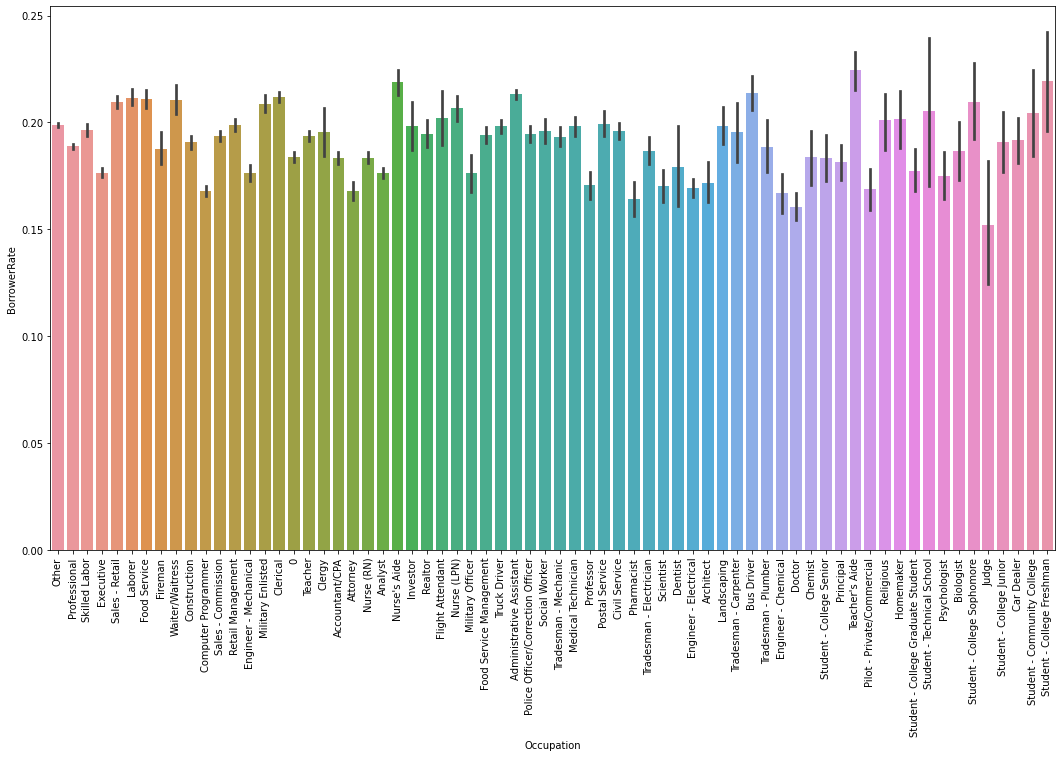

In [103]:
plt.figure(figsize=(18,10))
sns.barplot(y='BorrowerRate',x='Occupation',data = data)
plt.xticks(rotation=90)

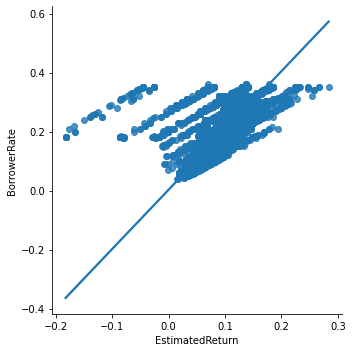

In [108]:
sns.lmplot(x='EstimatedReturn',y='BorrowerRate',data=data[-(data['EstimatedReturn'] == 0)])

### What is the most frequent State ?

seems like California is the most frequent state

c:\users\alaa_\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'CO'),
  Text(1, 0, 'GA'),
  Text(2, 0, 'MN'),
  Text(3, 0, 'NM'),
  Text(4, 0, 'KS'),
  Text(5, 0, 'CA'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'MD'),
  Text(8, 0, '0'),
  Text(9, 0, 'AL'),
  Text(10, 0, 'AZ'),
  Text(11, 0, 'VA'),
  Text(12, 0, 'FL'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'OR'),
  Text(15, 0, 'MI'),
  Text(16, 0, 'NY'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'WI'),
  Text(19, 0, 'OH'),
  Text(20, 0, 'NC'),
  Text(21, 0, 'WA'),
  Text(22, 0, 'NV'),
  Text(23, 0, 'NJ'),
  Text(24, 0, 'TX'),
  Text(25, 0, 'AR'),
  Text(26, 0, 'SC'),
  Text(27, 0, 'DE'),
  Text(28, 0, 'MO'),
  Text(29, 0, 'NE'),
  Text(30, 0, 'UT'),
  Text(31, 0, 'DC'),
  Text(32, 0, 'MA'),
  Text(33, 0, 'CT'),
  Text(34, 0, 'IN'),
  Text(35, 0, 'KY'),
  Text(36, 0,

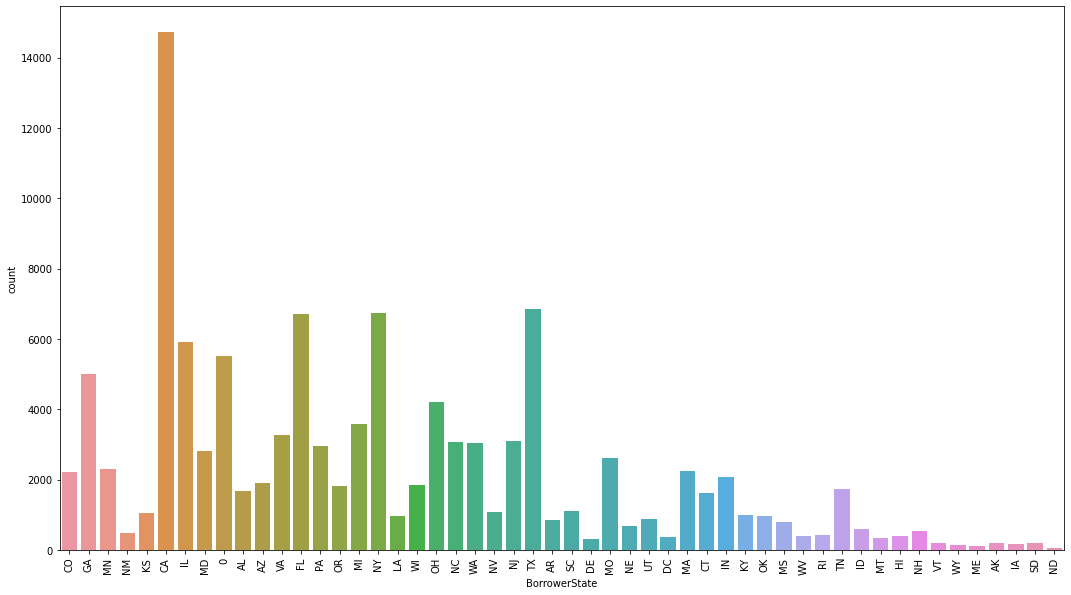

In [110]:
plt.figure(figsize=(18,10))
sns.countplot(data['BorrowerState'])
plt.xticks(rotation=90)